<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Practico Mentoria - Analisis y Visualizacion de Datos</h1>
<h2><FONT COLOR="#FF0000"> Autor: Máximo Zoppini</FONT></h2>
<h3> Importaciones </h3>


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import scipy as sp
from scipy import stats

from collections import OrderedDict
from IPython.display import display
from scipy.stats import variation, zscore, kstest, norm

from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [3]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

<h3> Carga de los Datasets </h3>

In [4]:
#dataset = pandas.read_csv('C:\Diplomatura\DataSets\hfi_cc_2018.csv')
#dataset.shape

#df_player = pd.read_csv('C:\Diplomatura\DataSets\football_player.csv',encoding='utf-8')
df_player = pd.read_csv('football_player.csv')
df_team = pd.read_csv('football_team.csv')
df_match = pd.read_csv('football_match.csv')



<h2>Exploremos un poco los Datasets</h2>

<h3>Players Dataset</h3>


In [5]:
print("Shape = {}".format(df_player.shape))

Shape = (9925, 44)


In [6]:
df_player.sample(10)

,player_name,birthday,age,height_m,weight_kg,imc,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
858,Ariel Borysiuk,1991-07-29,24,1.80,69.85,21.48,66.12,74.38,right,medium,...,70.46,49.21,51.58,63.58,63.08,12.71,13.04,18.71,15.54,13.04
8529,Sava Miladinovic Bento,1991-01-02,25,1.83,72.12,21.56,58.00,64.43,right,medium,...,59.64,49.50,41.64,46.57,40.07,8.00,8.00,8.00,7.00,14.00
2527,Dusan Tadic,1988-11-20,27,1.80,76.20,23.43,78.16,81.88,left,medium,...,84.32,76.28,39.96,35.56,27.56,10.16,10.16,12.56,8.16,15.16
8473,Samuel Souprayen,1989-02-18,27,1.88,74.84,21.18,64.24,71.76,left,medium,...,46.52,42.71,65.62,65.19,66.90,8.33,10.95,15.19,14.19,14.19
1958,Daniele Croce,1982-09-09,33,1.73,68.04,22.81,67.68,67.68,right,high,...,68.47,59.74,52.26,56.89,59.53,11.74,11.74,5.74,7.74,12.74
4555,John Arne Riise,1980-09-24,35,1.88,82.10,23.24,76.32,77.64,left,high,...,64.14,70.59,75.45,79.59,80.59,13.27,10.09,33.14,13.50,13.68
8408,Saidy Janko,1995-10-22,20,1.78,69.85,22.10,62.13,76.53,right,high,...,41.00,51.20,58.53,65.87,64.60,5.27,9.27,7.27,13.27,7.27
3743,Helder Postiga,1982-08-02,33,1.80,76.20,23.43,76.04,76.93,right,high,...,67.15,70.59,25.37,28.11,27.19,12.00,9.81,20.67,16.37,14.59
2314,Denzel Slager,1993-05-02,23,1.83,81.19,24.28,61.50,70.75,left,high,...,47.00,50.00,20.62,20.00,21.00,14.00,8.00,11.00,11.00,15.00
2992,Fernando Marcal,1989-02-19,27,1.78,72.12,22.81,70.88,75.41,left,high,...,51.53,42.35,65.47,70.00,71.53,5.35,10.35,13.35,12.35,10.35


In [7]:
df_player.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

<h3> Teams Dataset</h3>

In [8]:
print("Shape = {}".format(df_team.shape))

Shape = (288, 22)


In [9]:
df_team.sample(10)

,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
276,BSC Young Boys,YB,53.83,Balanced,Little,63.00,Mixed,Organised,46.00,Normal,...,52.00,Normal,Organised,46.50,Medium,40.00,Press,53.50,Normal,Cover
98,VfL Wolfsburg,WOL,61.33,Balanced,Little,51.33,Mixed,Organised,67.00,Risky,...,57.17,Normal,Organised,55.00,Medium,47.17,Press,53.00,Normal,Cover
186,Widzew Łódź,LOD,65.25,Balanced,Little,62.75,Long,Organised,56.75,Normal,...,53.00,Normal,Organised,34.25,Deep,42.75,Press,59.00,Normal,Cover
73,FC Sochaux-Montbéliard,SOC,61.33,Balanced,Little,46.00,Mixed,Organised,53.67,Normal,...,46.83,Normal,Organised,54.33,Medium,42.83,Press,54.33,Normal,Cover
269,RC Celta de Vigo,CEL,48.67,Balanced,Little,49.67,Mixed,Organised,52.67,Normal,...,56.00,Normal,Organised,42.67,Medium,47.00,Press,59.50,Normal,Cover
226,Heart of Midlothian,HEA,59.60,Balanced,Little,60.00,Mixed,Organised,58.40,Normal,...,64.00,Normal,Organised,53.40,Medium,59.00,Press,61.40,Normal,Cover
35,Middlesbrough,MID,62.67,Balanced,Little,55.83,Mixed,Organised,51.00,Normal,...,56.00,Normal,Organised,39.33,Medium,47.00,Press,42.83,Normal,Cover
154,Vitesse,VIT,42.00,Balanced,Little,39.00,Mixed,Organised,53.83,Normal,...,59.83,Normal,Organised,45.17,Medium,50.17,Press,52.33,Normal,Cover
253,Real Betis Balompié,BET,52.33,Balanced,Little,40.67,Mixed,Organised,55.67,Normal,...,56.50,Normal,Organised,54.00,Medium,46.83,Press,56.67,Normal,Cover
108,Karlsruher SC,KAR,57.40,Balanced,Little,47.40,Mixed,Organised,60.00,Normal,...,54.60,Normal,Organised,43.40,Medium,44.80,Press,45.40,Normal,Cover


In [10]:
df_team.dtypes

team_long_name                     object
team_short_name                    object
buildUpPlaySpeed                  float64
buildUpPlaySpeedClass              object
buildUpPlayDribblingClass          object
buildUpPlayPassing                float64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing             float64
chanceCreationPassingClass         object
chanceCreationCrossing            float64
chanceCreationCrossingClass        object
chanceCreationShooting            float64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                   float64
defencePressureClass               object
defenceAggression                 float64
defenceAggressionClass             object
defenceTeamWidth                  float64
defenceTeamWidthClass              object
defenceDefenderLineClass           object
dtype: object

<h3>Matchs Dataset</h3>

In [11]:
print("Shape = {}".format(df_match.shape))

Shape = (25979, 15)


In [12]:
df_match.sample(10)

,country_name,league_name,season,stage,date,home_team_long_name,home_short_long_name,away_team_long_name,away_short_long_name,home_team_goal,away_team_goal,total_goal,B365H,B365D,B365A
15289,Netherlands,Netherlands Eredivisie,2014/2015,28,2015-03-20,FC Utrecht,UTR,NAC Breda,NAC,3,4,7,1.50,3.9,7.00
6697,France,France Ligue 1,2013/2014,11,2013-10-26,Valenciennes FC,VAL,Évian Thonon Gaillard FC,ETG,0,1,1,2.00,3.3,3.80
15489,Netherlands,Netherlands Eredivisie,2015/2016,17,2015-12-19,Heracles Almelo,HER,FC Groningen,GRO,2,1,3,2.20,3.4,3.20
2579,England,England Premier League,2010/2011,18,2011-01-26,Liverpool,LIV,Fulham,FUL,1,0,1,1.53,3.8,7.00
10264,Italy,Italy Serie A,2008/2009,1,2008-08-31,Torino,TOR,Lecce,LEC,3,0,3,1.80,3.1,5.25
17444,Poland,Poland Ekstraklasa,2015/2016,14,2015-10-30,Górnik Łęczna,LEC,Cracovia,CKR,1,0,1,NaN,NaN,NaN
11088,Italy,Italy Serie A,2010/2011,16,2010-12-12,Brescia,BRE,Sampdoria,SAM,1,0,1,2.90,3.1,2.55
467,Belgium,Belgium Jupiler League,2009/2010,30,2010-03-21,Standard de Liège,STL,KAA Gent,GEN,0,2,2,1.85,3.6,4.00
17525,Poland,Poland Ekstraklasa,2015/2016,23,2016-02-21,Polonia Bytom,GOR,Ruch Chorzów,CHO,0,2,2,NaN,NaN,NaN
15773,Poland,Poland Ekstraklasa,2008/2009,15,2008-11-22,GKS Bełchatów,BEL,Jagiellonia Białystok,BIA,2,0,2,NaN,NaN,NaN


In [13]:
df_match.dtypes

country_name             object
league_name              object
season                   object
stage                     int64
date                     object
home_team_long_name      object
home_short_long_name     object
away_team_long_name      object
away_short_long_name     object
home_team_goal            int64
away_team_goal            int64
total_goal                int64
B365H                   float64
B365D                   float64
B365A                   float64
dtype: object


<h2>Ejercicios</h2>

> Ejercicio 1

Calcular los siguientes Estadisticos:

    Moda
    Media
    Mediana
    Desviacion Estandar
    Minimo y Maximo

de variables como el 'Shot Power' y 'Long Shots de los jugadores.

Ver si responden a alguna distribución conocida.


#### Moda de 'Shot Power' y Distribucion (Histograma)

In [14]:
## Remuevo las columnas que sean categoricas nominales.
nonordinals_cols_to_remove = ['player_name','birthday','preferred_foot','attacking_work_rate','defensive_work_rate']
df_player_range = df_player.drop(columns = nonordinals_cols_to_remove)

In [15]:
## Calculo el rango para cada columna.
pd.DataFrame([df_player_range.min(), df_player_range.max(), df_player_range.max() - df_player_range.min()], 
                     index=['min','max','rango']).transpose()

,min,max,rango
age,17.00,47.00,30.00
height_m,1.57,2.08,0.51
weight_kg,53.07,110.22,57.15
imc,17.87,30.87,13.00
overall_rating,47.00,92.19,45.19
potential,51.00,95.23,44.23
crossing,6.00,89.36,83.36
finishing,5.00,92.23,87.23
heading_accuracy,8.00,93.11,85.11
short_passing,10.57,95.18,84.61


<h4>Interpretacion:</h4>

De la tabla anterior, podemos observar que:

Se obtuvieron las variables asociadas a los jugadores entre 17 y 47 años.

Con respecto a las variable shot_power, sus valores varian entre 9.92 a 93.08 para los 9925 futbolistas que tiene el data set.

Con respecto a las variable long_shots, sus valores varian entre 6.00 a 89.88 para los 9925 futbolistas que tiene el data set.


In [16]:

## Remuevo valores NaN
df_player_cleaned = df_player[['age','preferred_foot','shot_power', 'long_shots']].dropna()

In [17]:

## Una pequeña descripcion para saber con que valores estoy tratando
df_player_cleaned.describe()

,age,shot_power,long_shots
count,9925.000000,9925.000000,9925.000000
mean,28.207456,59.672008,50.919684
std,5.106009,15.287306,17.356235
min,17.000000,9.920000,6.000000
25%,24.000000,52.270000,38.800000
50%,28.000000,63.030000,55.150000
75%,32.000000,70.570000,64.040000
max,47.000000,93.080000,89.880000


In [18]:
## Medidas descriptivas para los campos shot_power y long_shots para el data set df_player
raw = {'shot_power': [df_player_cleaned.shot_power.median(), df_player_cleaned.shot_power.mean(), df_player_cleaned.shot_power.std()],
       'long_shots': [df_player_cleaned.long_shots.median(), df_player_cleaned.long_shots.mean(), df_player_cleaned.long_shots.std()]}
pd.DataFrame(raw, index=['mediana','media','desviacion'])

,shot_power,long_shots
mediana,63.030000,55.150000
media,59.672008,50.919684
desviacion,15.287306,17.356235


<h4> Vale la pena calcular la moda?</h4>

In [19]:
## shot_power
## Cuantas modas hay
shot_power_mode_count = df_player_cleaned.shot_power.mode().count()

## Valor de la moda o modas.
shot_power_mode = df_player_cleaned.shot_power.mode()

## Frecuencias de shot_power.
shot_power_frec = pd.value_counts(df_player_cleaned.shot_power).to_frame().reset_index()
shot_power_frec.columns = ['shot_power','frecuencia']

## long_shots
## Cuantas modas hay
long_shots_mode_count = df_player_cleaned.long_shots.mode().count()

## Valor de la moda o modas.
long_shots_mode = df_player_cleaned.long_shots.mode()

## Frecuencias de long_shots.
long_shots_frec = pd.value_counts(df_player_cleaned.long_shots).to_frame().reset_index()
long_shots_frec.columns = ['long_shots','frecuencia']

## Armo cuadro con resutados.
raw = {
    'mode_count': [shot_power_mode_count, long_shots_mode_count],
    'mode': [shot_power_mode[0] if shot_power_mode_count == 1 else None, long_shots_mode[0] if long_shots_mode_count == 1 else None ]
}
pd.DataFrame(raw, index=['shot_power','long_shots'])

,mode_count,mode
shot_power,1,63.0
long_shots,1,59.0


In [20]:
long_shots_mode2 = df_player_cleaned.long_shots.mode()
shot_power_mode2 = df_player_cleaned.shot_power.mode()
long_shots_mode2
shot_power_mode2
long_shots_mode_count

1

<h4>Interpretacion</h4>
Poder de tiro (shots_power) y tiros libres (longs_shots)

Si observamos la media para ambos grupos vemos que son bastante parecidos. Los coeficientes de variacion indican que las observaciones en el long_shots presentan una leve mayor dispersion con respecto a la media que el grupo de shots_power.

Si observamos la mediana para shot_power el valor central observado es de 59.672008 y para long_shots es de  50.919684 


¿Validamos si tiene sentido calcular la moda?

Segun lo que observamos,que ambos campos tienen una sola moda, las cuales son:
shots_power=63
long_shots=59

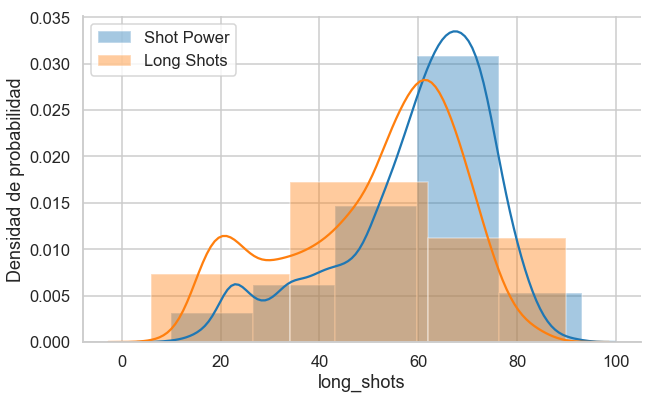

In [21]:
### Distribucion que responde este campo

### plt.figure(figsize=(10,6))
### sns.distplot(df_player_cleaned.long_shots, kde=True, bins=10, label='Shot Power')
### sns.despine()

### plt.ylabel('Densidad de probabilidad')
### plt.xlabel('Shot Power')
### plt.legend()

plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "shot power"  
sns.distplot(df_player_cleaned.shot_power, kde=True, bins=5, label='Shot Power')

## Grafico la distribucion del puntaje "long shots"  
sns.distplot(df_player_cleaned.long_shots, kde=True, bins=3, label='Long Shots')
sns.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

In [22]:
#Asimetría y Curtosis de pf_identity Global:
print('shot_power:')
print(stats.skew(df_player_cleaned['shot_power'].dropna()), '(Asimetría)')
print(stats.kurtosis(df_player_cleaned['shot_power'].dropna()), '(Curtosis)')
print()

#Asimetría y Curtosis de hf_score Global:
print('long_shots:')
print(stats.skew(df_player_cleaned['long_shots'].dropna()), '(Asimetría)')
print(stats.kurtosis(df_player_cleaned['long_shots'].dropna()), '(Curtosis)')
print()


shot_power:
-0.9082444399727565 (Asimetría)
0.2820089529401022 (Curtosis)

long_shots:
-0.5317533149305995 (Asimetría)
-0.7076078929372929 (Curtosis)



<h4>Interpretacion:</h4>
<h5>Shot_power</h5>
Sigue una distribucion normal, con un  leve sesgo a la izquierda (asimetria negativa).
Su cola de distribución se alargan a la izquierda, con valores inferiores a su media.

<h5>Long_shots</h5>
Sigue una distribucion normal, con un  leve sesgo a la izquierda (asimetria negativa), tiene un sesgo mucho menos que el campo shot power.
Su cola de distribución se alargan a la izquierda, con valores inferiores a su media.

> Ejercicio 2

Realizar un Análisis de valores atípicos (outliers) de las variables anteriores.

In [23]:
## Outliers por grupo usando x veces la distancia a la media.

df_player_cleaned['shot_power_zscore'] = zscore(df_player_cleaned["shot_power"])
df_player_cleaned['long_shots_zscore'] = zscore(df_player_cleaned["long_shots"])

shot_power_zscore_outliers = df_player_cleaned["shot_power_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)
long_shots_zscore_outliers = df_player_cleaned["long_shots_zscore"].apply(
    ## Si zscore es menor 2.5 o mayor a 2.5, el valor observado esta en el 5% mas chico o mas grande.
  lambda x: x <= -2.5 or x >= 2.5
)

In [24]:
###Outliers de shots_power usando "x" veces la distancia la media:
df_player_cleaned[shot_power_zscore_outliers][["age","shot_power"]]


,age,shot_power
88,31,19.60
169,33,20.76
263,31,18.82
285,35,19.41
365,39,21.29
378,38,20.73
436,25,21.37
454,31,19.38
653,25,20.94
839,21,21.00


In [25]:
###Outliers de long_shots usando "x" veces la distancia la media:
df_player_cleaned[long_shots_zscore_outliers][["age","long_shots"]]

,age,long_shots
4840,20,7.00
6745,21,6.00
8266,41,7.43


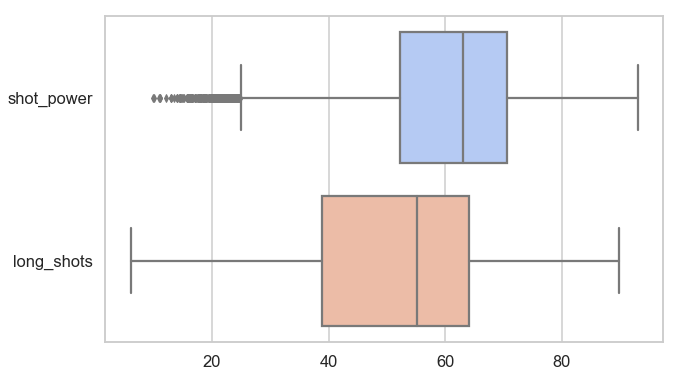

In [26]:
#Para observar valores atípicos visualizamos el gráfico de caja...
plt.figure(figsize=(10,6))
data = df_player_cleaned[['shot_power', 'long_shots']]
sns.boxplot(data = data, orient="h", palette="coolwarm")
#sns.stripplot(data=data, color='black')
plt.show()


In [27]:
print(data.quantile(0.25))
print()
print(data.quantile(0.75))

shot_power    52.27
long_shots    38.80
Name: 0.25, dtype: float64

shot_power    70.57
long_shots    64.04
Name: 0.75, dtype: float64


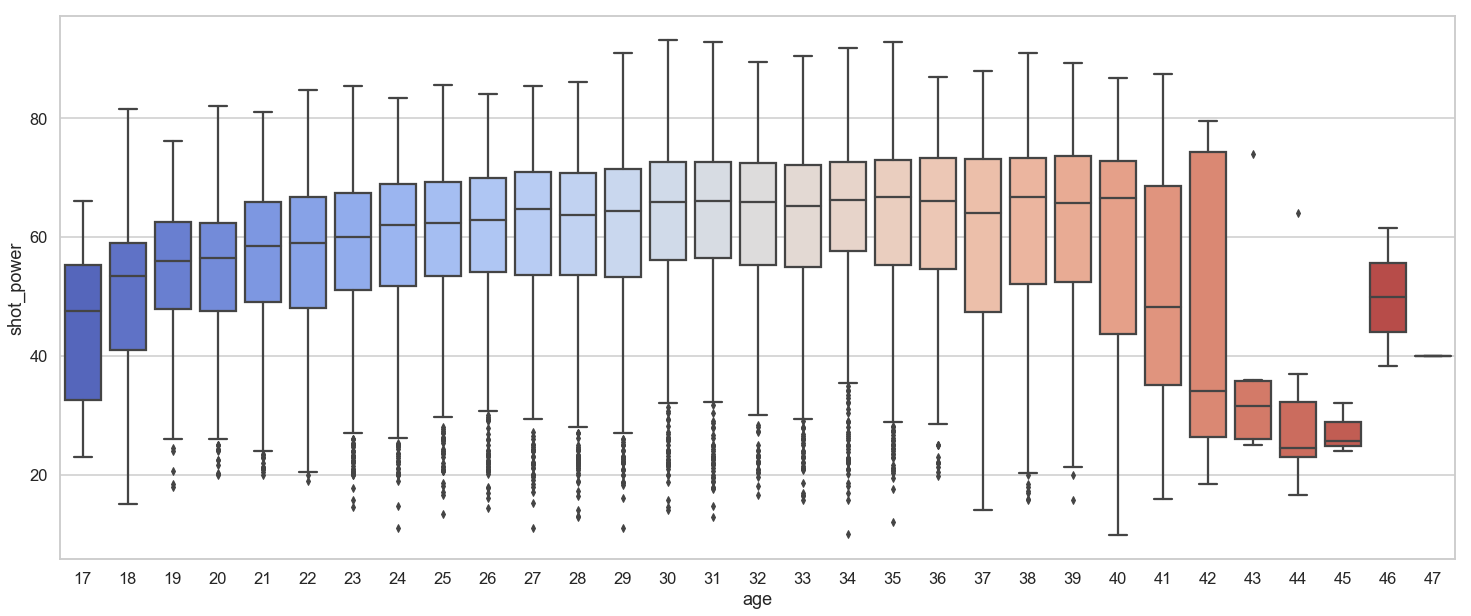

In [28]:
## Box plot para shot_power
plt.figure(figsize=(25,10))
sns.boxplot(x="age", y="shot_power", data=df_player_cleaned, palette="coolwarm")

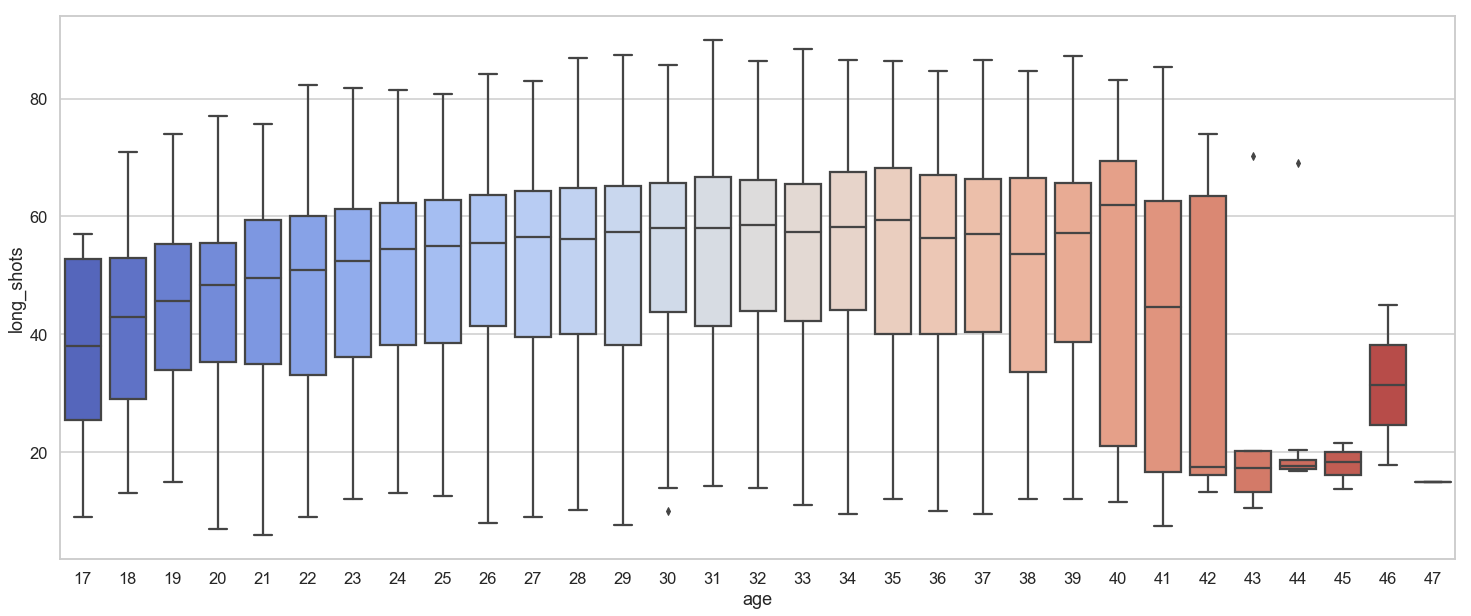

In [29]:
## Box plot para shot_power
plt.figure(figsize=(25,10))
sns.boxplot(x="age", y="long_shots", data=df_player_cleaned, palette="coolwarm")

In [30]:
###tips = sns.load_dataset("tips")

In [31]:
#Calculamos límites para Valores atípicos de los Quartiles:

AtMin_shot_power = data.quantile(0.25)[0] - (1.5 * (data.quantile(0.75)[0] - data.quantile(0.25)[0]))
AtMax_shot_power = data.quantile(0.75)[0] + (1.5 * (data.quantile(0.75)[0] - data.quantile(0.25)[0]))

AtMin_long_shots = data.quantile(0.25)[1] - (1.5 * (data.quantile(0.75)[1] - data.quantile(0.25)[1]))
AtMax_long_shots = data.quantile(0.75)[1] + (1.5 * (data.quantile(0.75)[1] - data.quantile(0.25)[1]))

print('límites para shot power: (', AtMin_shot_power, ',', AtMax_shot_power,')')
print('límites para long shots: (', AtMin_long_shots, ',' , AtMax_long_shots,')')

límites para shot power: ( 24.820000000000018 , 98.01999999999998 )
límites para long shots: ( 0.9399999999999835 , 101.90000000000002 )


In [32]:
#Valores Atípicos para shot_power

df_player_cleaned.loc[(df_player_cleaned['shot_power'] <= AtMin_shot_power) | (df_player_cleaned['shot_power'] >= AtMax_shot_power)]

,age,preferred_foot,shot_power,long_shots,shot_power_zscore,long_shots_zscore
88,31,right,19.60,19.20,-2.621392,-1.827659
169,33,right,20.76,14.41,-2.545509,-2.103655
227,42,right,22.00,15.78,-2.464391,-2.024716
245,17,right,23.00,9.00,-2.398974,-2.415374
258,24,left,24.62,18.88,-2.292999,-1.846097
263,31,right,18.82,18.82,-2.672418,-1.849554
272,27,right,24.20,14.33,-2.320474,-2.108264
277,32,right,23.35,42.00,-2.376078,-0.513944
285,35,right,19.41,31.94,-2.633822,-1.093592
365,39,right,21.29,12.64,-2.510837,-2.205640


In [33]:
#Valores Atípicos para long_Shots:

df_player_cleaned.loc[(df_player_cleaned['long_shots'] <= AtMin_long_shots) | (df_player_cleaned['long_shots'] >= AtMax_long_shots)]

,age,preferred_foot,shot_power,long_shots,shot_power_zscore,long_shots_zscore


In [34]:
#Los outliers de hf_score son de grupo: Syria (Middle East & North Africa), aumentando en número si el análisis es por Región.
#Sugeriríamos eliminarlos si el foco fuera GLOBAL (son pocos), analizarlos -tal vez ajustarlos- si fuera REGIONAL.

> Ejercicio 3

Explicar cómo varía el analisis hecho anteriormente cuando se desglosan por la pierna hábil.  
Comparar cualitativamente y gráficamente ambas distribuciones.

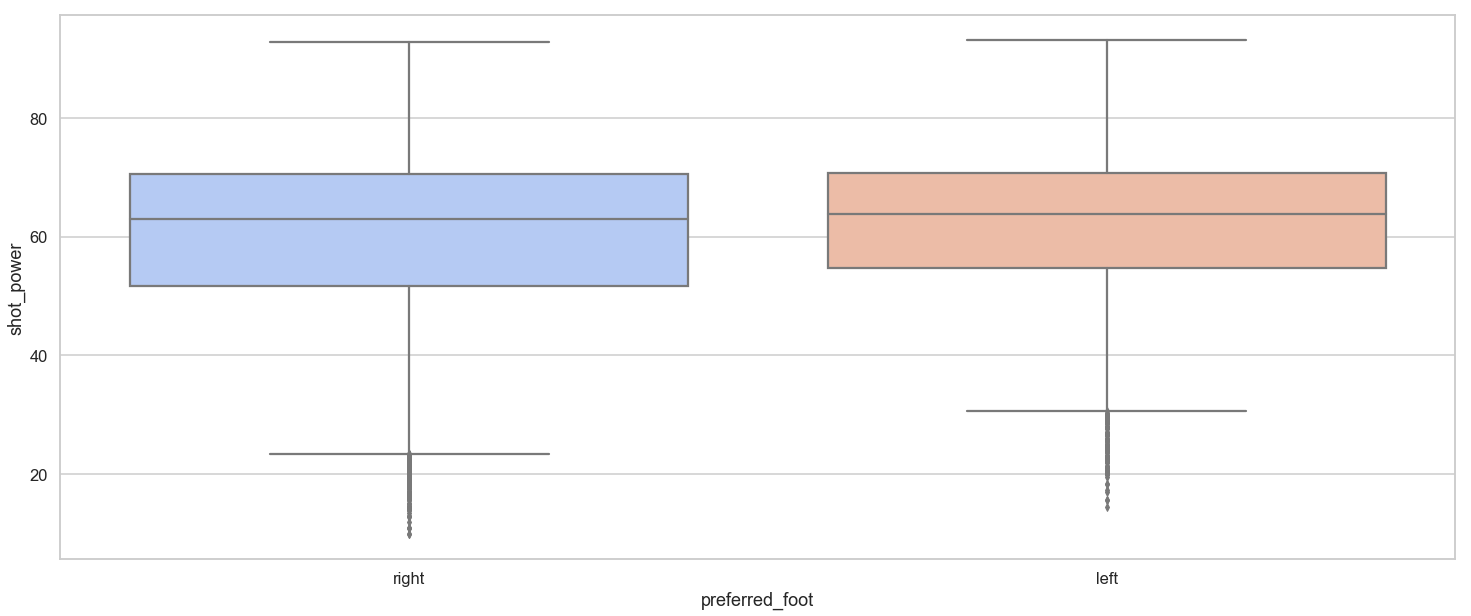

In [35]:

## Box plot para pf_identity
plt.figure(figsize=(25,10))
sns.boxplot(x="preferred_foot", y="shot_power", data=df_player_cleaned, palette="coolwarm")

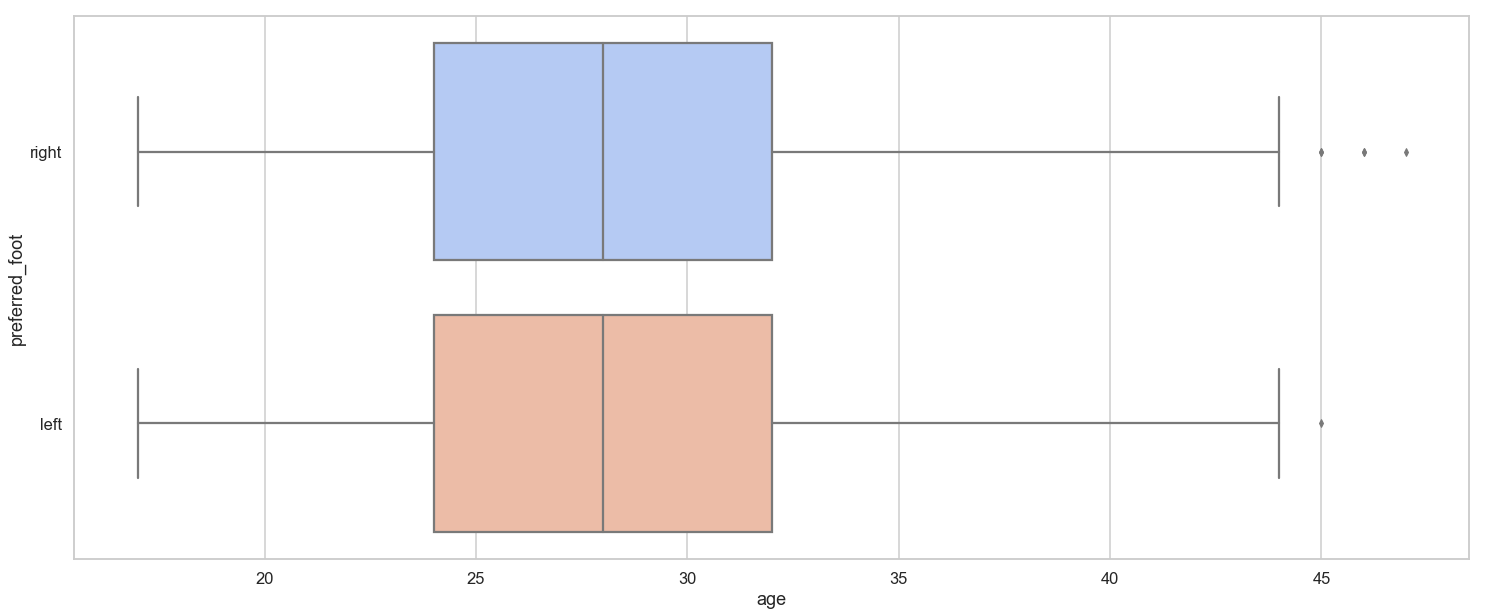

In [36]:

## Box plot para pf_identity
plt.figure(figsize=(25,10))
sns.boxplot(x="age", y="preferred_foot", data=df_player_cleaned, palette="coolwarm")

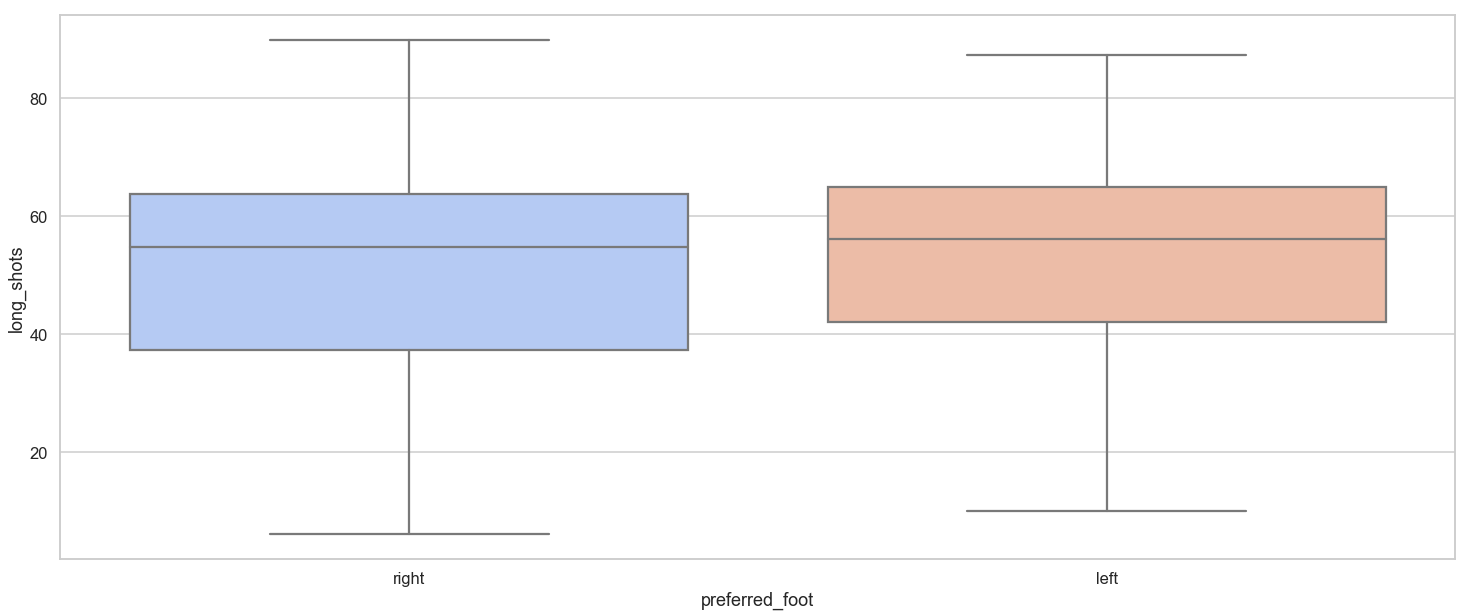

In [37]:
## Box plot para pf_identity
plt.figure(figsize=(25,10))
sns.boxplot(x="preferred_foot", y="long_shots", data=df_player_cleaned, palette="coolwarm")

> Ejercicio 4

Graficar la correlacion de los features de los jugadores.  
Calcular la correlacion entre los features 'Shot Power' y 'Long Shots' desglosando por la pierna habil.

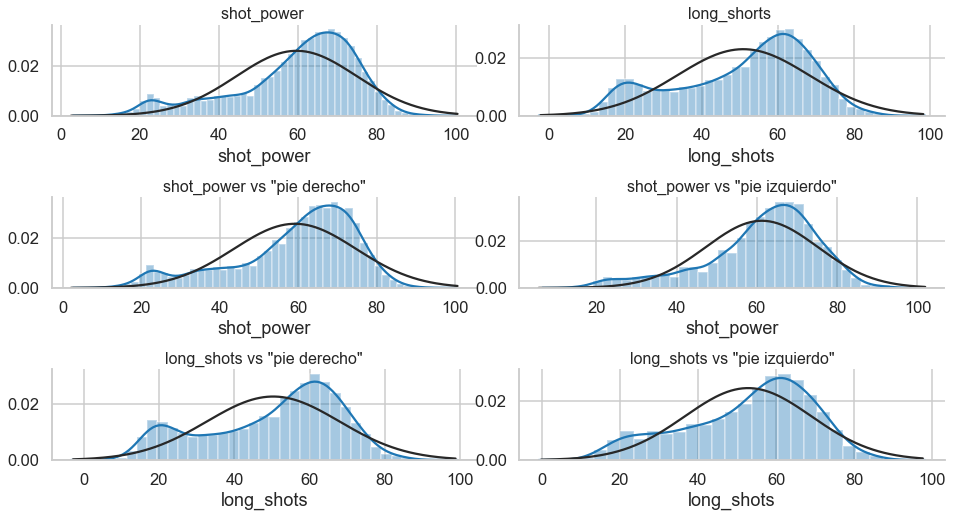

In [38]:
#Comparamos shot_power y long_shots con su pie habil con sus "normales".

fig, axes = plt.subplots(3, 2, figsize = (16, 8))
plt.subplots_adjust(hspace = 0.9, wspace = 0.1)
                         
sns.distplot(df_player_cleaned['shot_power'].dropna(), fit = stats.norm, ax = axes[0,0]).set_title('shot_power ', fontsize = 16)
sns.distplot(df_player_cleaned['long_shots'].dropna(), fit = stats.norm, ax = axes[0,1]).set_title('long_shorts ', fontsize = 16)

sns.distplot(df_player_cleaned.loc[df_player_cleaned['preferred_foot'] == 'right']['shot_power'].dropna(), fit = stats.norm, ax = axes[1,0]).set_title('shot_power vs "pie derecho"', fontsize = 16)
sns.distplot(df_player_cleaned.loc[df_player_cleaned['preferred_foot'] == 'left']['shot_power'].dropna(), fit = stats.norm, ax = axes[1,1]).set_title('shot_power vs "pie izquierdo"', fontsize = 16)

sns.distplot(df_player_cleaned.loc[df_player_cleaned['preferred_foot'] == 'right']['long_shots'].dropna(), fit = stats.norm, ax = axes[2,0]).set_title('long_shots vs "pie derecho"', fontsize = 16)
sns.distplot(df_player_cleaned.loc[df_player_cleaned['preferred_foot'] == 'left']['long_shots'].dropna(), fit = stats.norm, ax = axes[2,1]).set_title('long_shots vs "pie izquierdo"', fontsize = 16)

sns.despine()

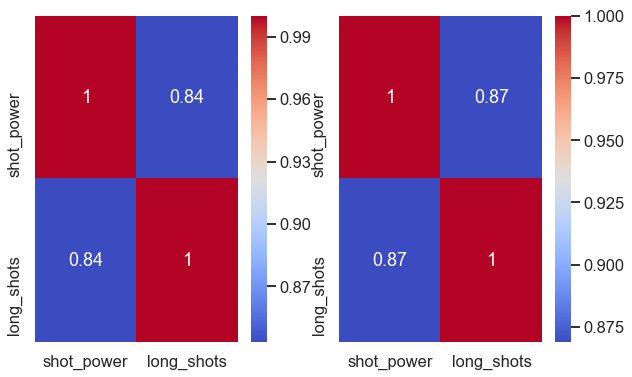

In [39]:
plt.figure(figsize=(10,6))

# Correlacion entre zurdos

plt.subplot(1,2,1)
sns.heatmap(df_player[df_player.preferred_foot=="left"][["shot_power", "long_shots"]].corr(method="pearson"), 
            annot=True, cmap="coolwarm")

# Correlacion entre diestros
plt.subplot(1,2,2)
sns.heatmap(df_player[df_player.preferred_foot=="right"][["shot_power", "long_shots"]].corr(method="pearson"), 
            annot=True, cmap="coolwarm")

In [40]:
# coeficiente de correlación
df_player_corr = df_player[df_player.preferred_foot=="right"][['shot_power','long_shots']].dropna()
df_player_corr.corr()

,shot_power,long_shots
shot_power,1.00000,0.86886
long_shots,0.86886,1.00000


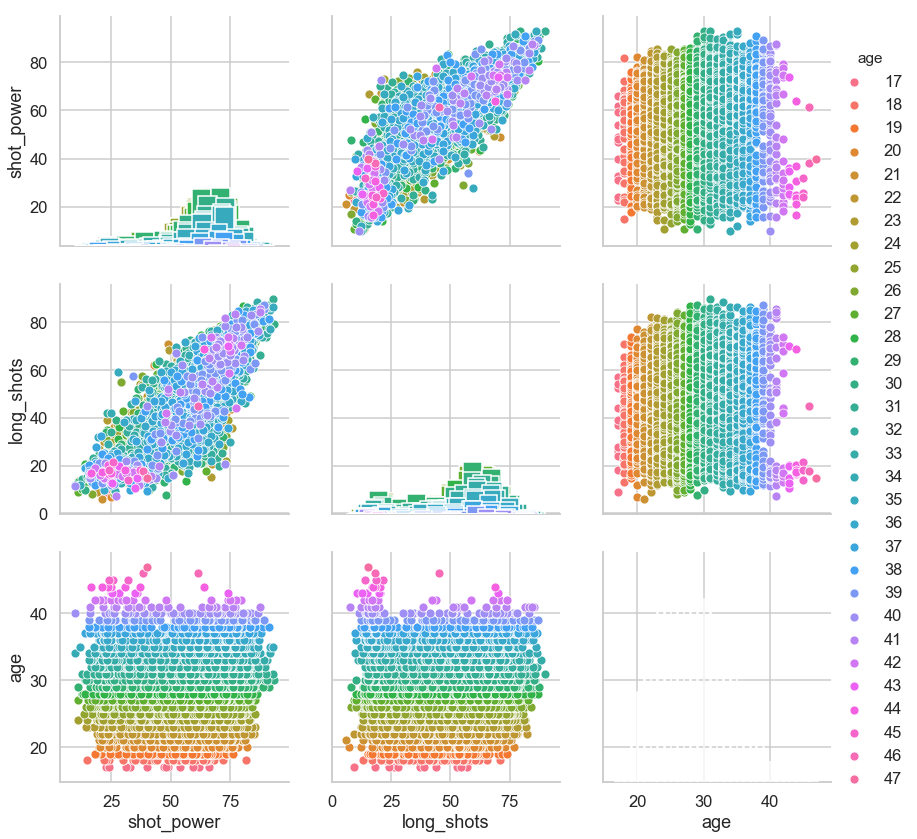

In [41]:
sns.pairplot(data=df_player, vars = ['shot_power','long_shots','age'], height = 4, hue = 'age', diag_kind = 'hist')

plt.show()

<h4>Interpretacion</h4>
dfdsfd

> Ejercicio 5

Graficar la correlacion de los entre los features 'Weight' y 'Age' de los jugadores. Que conclusiones se obtienen?  
Graficar la correlacion de los entre los features 'Height' y 'Age' de los jugadores. Que conclusiones se obtienen?

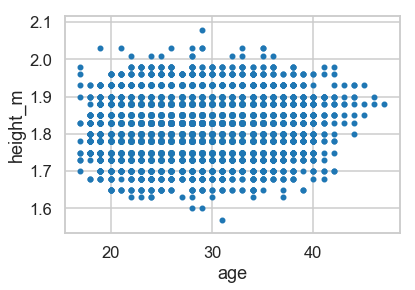

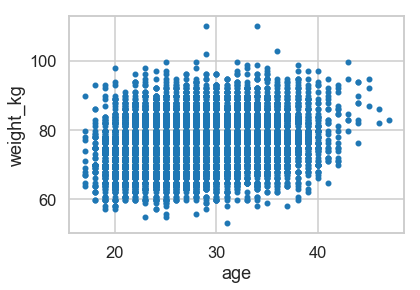

In [42]:
# diagrama de dispersión
                         
disp_height= df_player.plot(kind='scatter', x='age', y='height_m')
disp_weight= df_player.plot(kind='scatter', x='age', y='weight_kg')

In [43]:

# coeficiente de correlación
df_player_corr_height = df_player[['height_m','age']].dropna()
df_player_corr_height.corr()



,height_m,age
height_m,1.000000,0.077192
age,0.077192,1.000000


In [44]:

# coeficiente de correlación
df_player_corr_weight = df_player[['weight_kg','age']].dropna()
df_player_corr_weight.corr()

,weight_kg,age
weight_kg,1.000000,0.199906
age,0.199906,1.000000


In [45]:
#
plt.figure(figsize=(8, 6))

sns.heatmap(df_player_corr[['height_m','age']].corr(method = 'pearson'), annot=True)

plt.show()

KeyError: "None of [Index(['height_m', 'age'], dtype='object')] are in the [columns]"

<Figure size 576x432 with 0 Axes>

In [ ]:
#
plt.figure(figsize=(8, 6))

sns.heatmap(df_player_corr[['weight_kg','age']].corr(method = 'pearson'), annot=True)

plt.show()

In [ ]:
datos_minimo=df_player['age'].min()
datos_maximo=df_player['age'].max()


pd.DataFrame([df_player['age'].min(), df_player['age'].max()], 
                     index=['min','max']).transpose()

<h4>Interpretacion Ejercicio 5</h4>
Correlacion entre Altura y Edad (Height y age)
La correlacion entre la altura y la edad es bastante baja, lo que nos sugiere que estas variables no están  relacionadas para este set de datos, esto tal vez se deba a que la edad minima del jugador es de 17  años y la edad maxima es de 47, o sea no son edades de maximo crecimiento de las personas.

Correlacion entre Peso y Edad (weight y age)



> Ejercicio 6

Liga Europea con mayor cantidad de partidos

In [ ]:
partidos_por_liga = df_match["league_name"].value_counts()
plt.figure(figsize=(12,6))
partidos_por_liga.plot(kind="barh",color='lightblue')
plt.xlabel('Partidos') 
plt.ylabel('Nombre Liga') 
plt.title('Liga Europea con mayor cantidad de partidos')

In [ ]:

print(partidos_por_liga)
print("\nLiga/s  Europea/s con mayor cantidad de partidos:\n{}".format(partidos_por_liga[partidos_por_liga==partidos_por_liga.max()]))

<h4>Interpretacion Ejercicio 6</h4>
Existen 3 ligas europeas que comparten el podio con mayor cantidad de partidos, para encontrar estos valores 
buscamos los valores maximos de partidos por liga

> Ejercicio 7

Top 10 de Equipos con mayor cantidad de goles convertidos: Total, Local y Visitante

In [ ]:
total_local = df_match.groupby(["home_team_long_name"])[["home_team_long_name", "home_team_goal"]].sum()
total_visitante = df_match.groupby(["away_team_long_name"])[["away_team_long_name", "away_team_goal"]].sum()
total_equipo = pd.concat([total_local, total_visitante], axis=1)
total_equipo["total_equipo_gol"] = total_equipo["home_team_goal"] + total_equipo["away_team_goal"]

# Los ordeno de mayor a menor
podio_total_local_gol = total_equipo.sort_values(["home_team_goal"], ascending=False)[0:10]["home_team_goal"]
podio_total_visitante_gol = total_equipo.sort_values(["away_team_goal"], ascending=False)[0:10]["away_team_goal"]
podio_total_equipo_gol = total_equipo.sort_values(["total_equipo_gol"], ascending=False)[0:10]["total_equipo_gol"]

display(podio_total_local_gol,podio_total_visitante_gol,podio_total_equipo_gol)
print("\nPodio Total Goles de Local:")
print(podio_total_local_gol)
print("\nPodio Total Goles De Visitante:")
print(podio_total_visitante_gol)
print("\nTotal Goles:")
print(podio_total_equipo_gol)


In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(5,1,1)
podio_total_local_gol.plot(kind='barh',color='lightblue')
plt.xlabel('Goles') 
plt.ylabel('Nombre Equipo') 
plt.title('Total Goles de Local')

plt.subplot(5,1,3)
podio_total_visitante_gol.plot(kind='barh', color='lightblue')
plt.xlabel('Goles') 
plt.ylabel('Nombre Equipo') 
plt.title('Total Goles de Vistante')

plt.subplot(5,1,5)
podio_total_equipo_gol.plot(kind='barh', title="Total Goles",color='lightblue')
plt.xlabel('Goles') 
plt.ylabel('Nombre Equipo') 
plt.title('Total Goles Visitante + Local')

<h4>Interpretacion Ejercicio 7</h4>

Luego de realizar los calculos, asumimos que los 10 equipos con mas cantidad de goles son:
<table>
<tr>
    <td>FC Barcelona</td>
    <td>849</td>
</tr>
<tr>
    <td>Real Madrid CF </td>
    <td>  843</td>
</tr>
<tr>
    <td>Celtic</td>               
     <td>695</td>
</tr>
<tr>
    <td>FC Bayern Munich  </td>   
    <td>653</td>
</tr>
<tr>
    <td>PSV</td>
    <td>652</td>
</tr>
<tr>
    <td>Ajax</td>
    <td>647</td>
</tr>
<tr>  
    <td>FC Basel</td>
    <td>619</td>
</tr>
<tr>
    <td>Manchester City</td>
    <td>606</td>
</tr>
<tr>
    <td>Chelsea</td>
    <td>583</td>
</tr>
<tr>
    <td>Manchester United</td>
    <td>582</td>
</tr>
</table>

Estando en el podio, el Equipo de FC Barcelona

> Ejercicio 8

Distribucion de Cantidad de goles convertidos: Total, Local y Visitante
Hacer un histograma
modificar esto.

In [ ]:
#Gráfico QQ para home_team_goal Global:

loc, scale = stats.norm.fit(total_equipo["home_team_goal"].dropna())
norm_dist = stats.norm(loc, scale)

percs = np.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

home_team_goal_global_sample = np.percentile(total_equipo["home_team_goal"].dropna(), percs)
home_team_goal_global_norm = np.percentile(norm_dist.rvs(len(total_equipo["home_team_goal"].dropna())), percs)

plt.figure(figsize=(12,6))

sns.regplot(x = home_team_goal_global_sample, y = home_team_goal_global_norm)

plt.xlabel('Percentiles de la muestra de Total de Goles de Local')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Total de Goles de Local y una distribución normal')

x = np.linspace(np.min((home_team_goal_global_sample.min(), home_team_goal_global_norm.min())), np.max((home_team_goal_global_sample.max(), pf_identity_global_norm.max())))
plt.plot(x,x, color='r', ls="--")

sns.despine()

In [ ]:
#Gráfico QQ para pf_identity Global:

loc, scale = stats.norm.fit(total_equipo["away_team_goal"].dropna())
norm_dist = stats.norm(loc, scale)

percs = np.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

away_team_goal_global_sample = np.percentile(total_equipo["away_team_goal"].dropna(), percs)
away_team_goal_global_norm = np.percentile(norm_dist.rvs(len(total_equipo["away_team_goal"].dropna())), percs)

plt.figure(figsize=(12,6))

sns.regplot(x = way_team_goal_global_sample, y = way_team_goal_global_norm)

plt.xlabel('Percentiles de la muestra de Total de Goles de Visitante')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Total de Goles de Visitante y una distribución normal')

x = np.linspace(np.min((away_team_goal_global_sample.min(), away_team_goal_global_norm.min())), np.max((away_team_goal_global_sample.max(), away_team_goal_global_norm.max())))
plt.plot(x,x, color='r', ls="--")

sns.despine()

In [ ]:
#Gráfico QQ para pf_identity Global:

loc, scale = stats.norm.fit(total_equipo["total_equipo_gol"].dropna())
norm_dist = stats.norm(loc, scale)

percs = np.linspace(0,100,10)  # Creamos 10 puntos percentiles igualmente distribuidos entre 0 y 100.

total_equipo_gol_global_sample = np.percentile(total_equipo["total_equipo_gol"].dropna(), percs)
total_equipo_gol_global_norm = np.percentile(norm_dist.rvs(len(total_equipo["total_equipo_gol"].dropna())), percs)

plt.figure(figsize=(12,6))

sns.regplot(x =total_equipo_gol_global_sample, y =total_equipo_gol_global_norm)

plt.xlabel('Percentiles de la muestra de Total de Goles')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Total de Goles y una distribución normal')

x = np.linspace(np.min((total_equipo_gol_global_sample.min(),total_equipo_gol_global_norm.min())), np.max((total_equipo_gol_global_sample.max(), pf_identity_global_norm.max())))
plt.plot(x,x, color='r', ls="--")

sns.despine()

> Ejercicio 9

Boxplot de Goles por Temporada

In [ ]:
plt.figure(figsize=(25,10))

temporada=df_match["season"]
total=df_match["total_goal"]

sns.boxplot(x=temporada, y=total, palette="coolwarm")

In [ ]:
Interpretacion a definir
ver que sucedio en las temporads 2009 y 2010


> Ejercicio 10

Resumen de Goles convertidos por Temporada: Total, Local y Visitante

In [ ]:
goles_por_temporada = df_match[["season", "home_team_goal", "away_team_goal", "total_goal"]].groupby("season").sum()
goles_por_temporada.sort_values(by = 'season', ascending = False)

In [ ]:
goles_por_temporada = df_match[["season", "home_team_goal", "away_team_goal", "total_goal"]].groupby("season").sum()
goles_por_temporada.sort_values(by = 'total_goal', ascending = False)

> Ejercicio 11

Proporciones de los resultados de los partidos

In [ ]:

goles_por_temporada["goles_local"] = df_match[["season", "home_team_goal"]].groupby("season").sum()
goles_por_temporada["goles_visitante"] = df_match[["season", "away_team_goal"]].groupby("season").sum()
goles_por_temporada["goles_total"] = df_match[["season", "total_goal"]].groupby("season").sum()



# Calculating average win percentage for each side:
result_avg_prop = pd.DataFrame((goles_por_temporada["goles_local"]+ goles_por_temporada["goles_visitante"] + goles_por_temporada["goles_total"]) / 3, 
                               columns = ['Porcentaje de Goles'])


# Plots average win percentage as a pie chart.
ax = result_avg_prop.plot(kind='pie', figsize =[6,6],autopct='%.2f', y='Porcentaje de Goles', fontsize =20, 
                          legend = False)
ax.set_title('Porcentaje de Goles Por Temporada', size=25)
#result_avg_prop

<h4>Interpretacion</h4>
Lo que podemos observar con el grafico de Barras, que existe una leve diferencia entre los totales de Goles por temporada.
La temporada con mas Goles corresponde a la Temporada 2015/2016 y la temporada con menor cantidad de Goles, 
corresponde a la temporada 2013/2014. Si observamos el punto 10, y la correspondiente tabla, se valida lo que 
se visualiza con el grafico del Ejercicio 11.